<a href="https://colab.research.google.com/github/Aayushi-Sharma24/Credit_Card_Default_Prediction_Classification/blob/main/Final_NoteBook_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

##Objective: To predict whether customer will default his/her payment of credit card.

#Loading the dataset

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projects -Draft/ML-Classification/default of credit card clients.xls',header=1)

In [4]:
#check first 5 values in dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#Check number of Rows and columns
df.shape

(30000, 25)

*   Rows: 30000
*   columns: 25



In [ ]:
#check all column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#check datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#check statistical representation of data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##Let's check for Missing values in the dataset

In [ ]:
#check null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

####There are no missing values in the dataset


##Let's check for duplicate values 

In [ ]:
#check duplicate rows
condition = bool(df.duplicated().sum())
if condition:
  print('There are duplicated IDs')
else:
  print('There are No duplicated IDs')

There are No duplicated IDs


#Exploratory Data Analysis

###Dependent variable

In [6]:
#renaming dependent variable
df.rename(columns={'default payment next month':'IsDefaulter'},inplace=True)

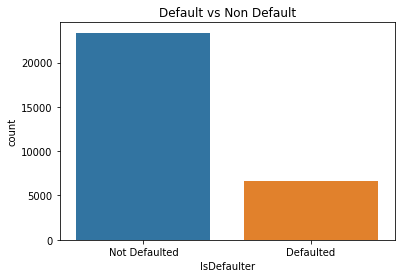

In [10]:
#Plotting dependent variable
ax = sns.countplot(x='IsDefaulter',data=df)
plt.title("Default vs Non Default")
ax.set_xticklabels(('Not Defaulted','Defaulted'))
plt.show()

###Independent variable

In [ ]:
#check count of unique values
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
#check count of unique values
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
#Aggregating values 4,5 and 6 to 0 as there are not much records in them
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [ ]:
#check count of unique values
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
#there are not much records in 3 and 0 values.
# Therefore, aggregating them
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [14]:
#Create new Dataframe for categorical variables
df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE']].copy()
df_cat['Defaulter'] = df['IsDefaulter']

#replace all values in categorical varibles with original names
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

###Which sex group tends to have more delayed payments?

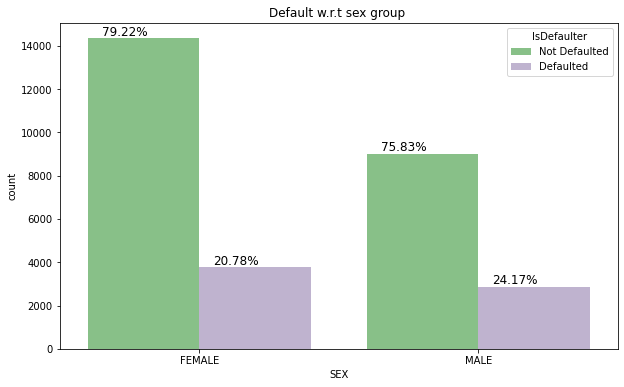

In [20]:
#Plotting data using countplot
plt.figure(figsize = (10,6))
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12,verticalalignment='bottom')
    plt.show()
ax = sns.countplot(x='SEX',hue='Defaulter',data=df_cat,palette='Accent')
plt.title("Default w.r.t sex group ")
plt.legend(title='IsDefaulter',loc = 'upper right',labels=['Not Defaulted','Defaulted'])
with_hue(ax,df_cat.SEX,2,2)

More or Less Males and Females have defaulted equally

###Did customers with higher education have less delayed payment?

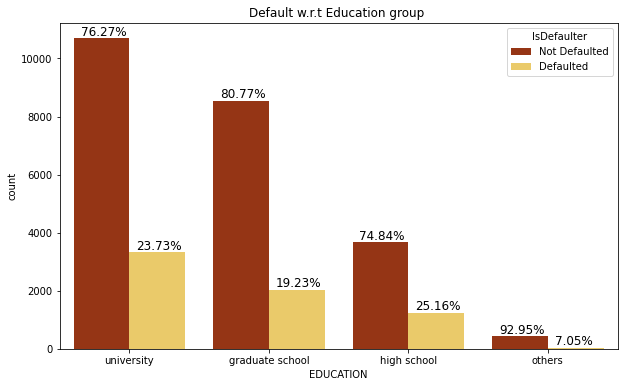

In [25]:
#Plotting data using countplot
plt.figure(figsize = (10,6))
ax = sns.countplot(x='EDUCATION',hue='Defaulter',data=df_cat,palette='afmhot')
plt.title("Default w.r.t Education group ")
plt.legend(title='IsDefaulter',loc = 'upper right',labels=['Not Defaulted','Defaulted'])
with_hue(ax,df_cat.EDUCATION,4,2)
plt.show()

university group has defaulted more compared to rest

###Which SEX group has made more defaults in their respective EDUCATION category?

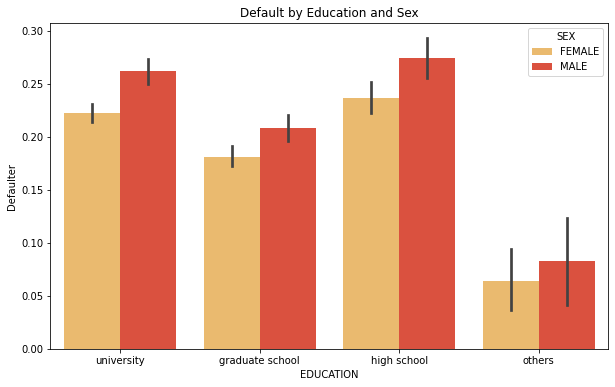

In [27]:
#Plotting data using countplot
plt.figure(figsize = (10,6))
sns.barplot(x="EDUCATION", y="Defaulter", hue="SEX", data=df_cat,palette='YlOrRd')
plt.title("Default by Education and Sex")
plt.show()

In all Education groups , Male members have defaulted more

###Does marital status have anything to do with default risk? 

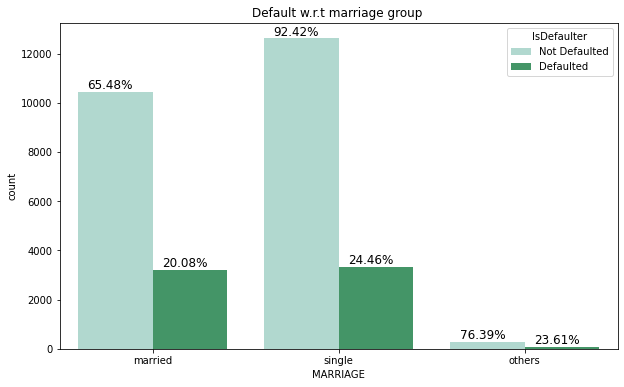

In [30]:
#Plotting data using countplot
plt.figure(figsize = (10,6))
ax = sns.countplot(x='MARRIAGE',hue='Defaulter',data=df_cat,palette='BuGn')
plt.title("Default w.r.t marriage group ")
plt.legend(title='IsDefaulter',loc = 'upper right',labels=['Not Defaulted','Defaulted'])
with_hue(ax,df_cat.MARRIAGE,3,2)
plt.show()

More or less Married and Single groups have same default rate

###Do younger people tend to miss the payment deadline?

In [34]:
#creating a new column "HAS_DEF"
# A Person has done atleast 1 Default
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
def_condition = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

In [35]:
#creating AGE groups
bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df_age = df['AGE']
df_age['AGE'] = pd.cut(df_age,bins=bins, labels=labels,right=False)


In [36]:
# Function to create Stacked bar graphs with percentage
def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df_age[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

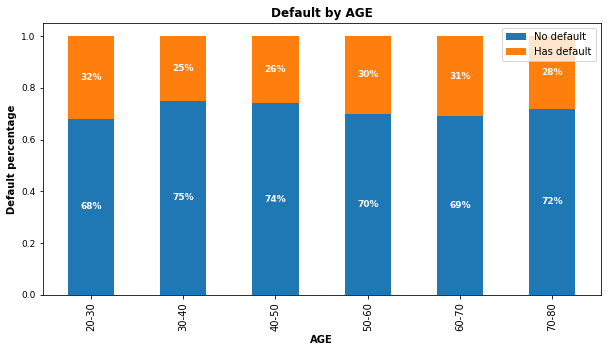

In [ ]:
create_stacked_bar('AGE')

Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.

###Is there any correlation between credit limit and the default payment next month?

Text(0.5, 1.0, 'Credit limit & default next month')

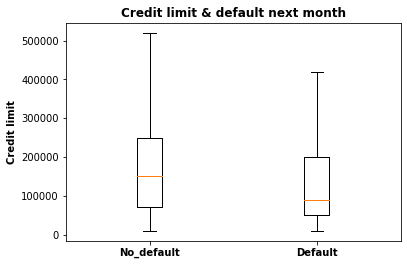

In [37]:
#separting people who has defaulted and Not defaulted
def0 = df.loc[df['IsDefaulter'] == 0,'LIMIT_BAL']
def1 = df.loc[df['IsDefaulter'] == 1,'LIMIT_BAL']

#Plotting data using Boxplot
fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')


Customers with high credit limits tend to have higher 'no-default'rate.

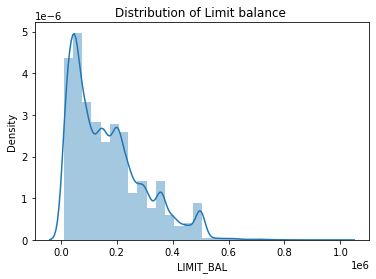

In [ ]:
#Plotting data using distplot
sns.distplot(df['LIMIT_BAL'],kde=True,bins=30)
plt.title("Distribution of Limit balance ")
plt.show()

##Overview of Bill Amount columns

In [38]:
#Renaming column names
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

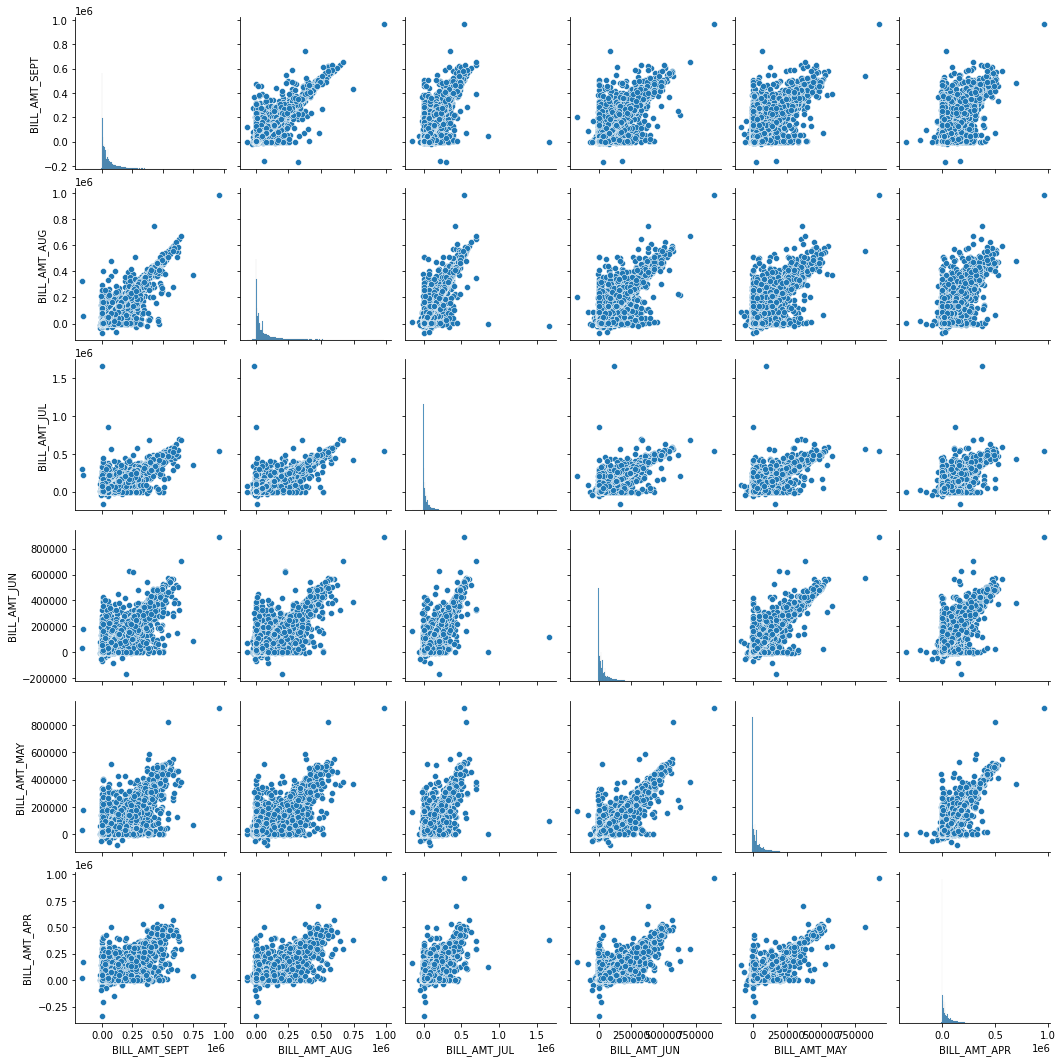

In [ ]:
#Plotting bill amount using pairplot
sns.pairplot(data = bill_amnt_df)

###History of payment status

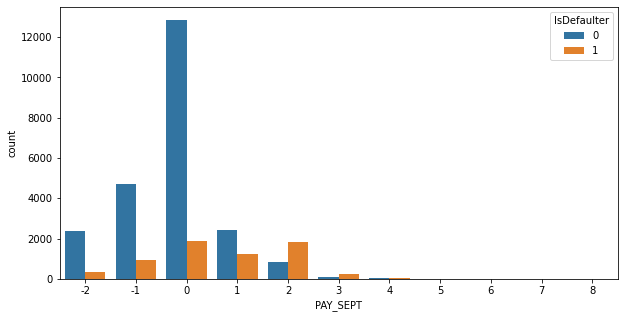

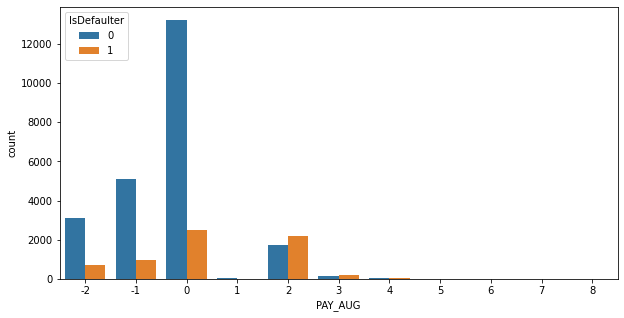

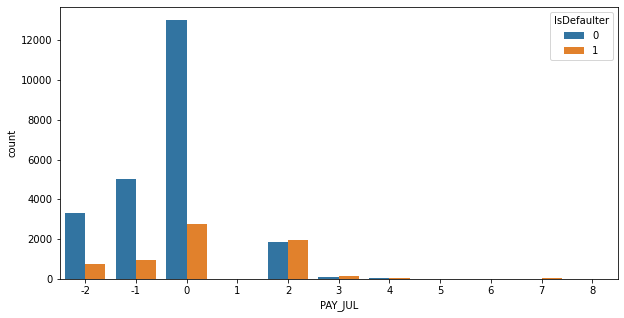

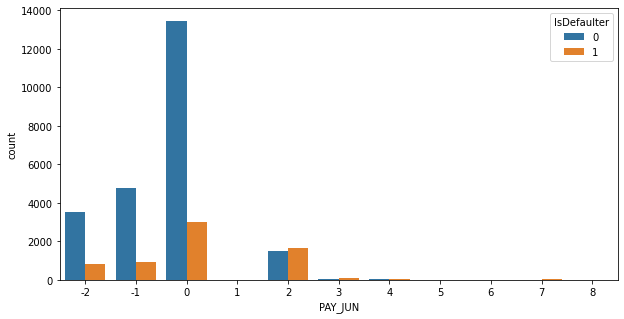

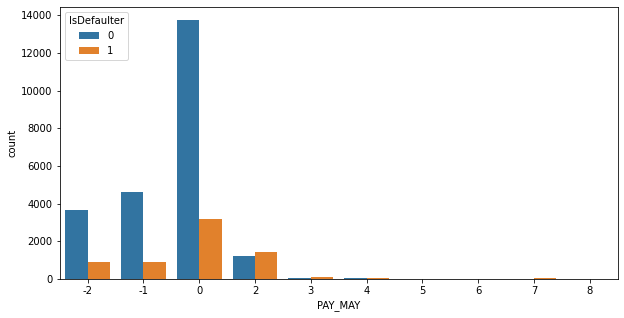

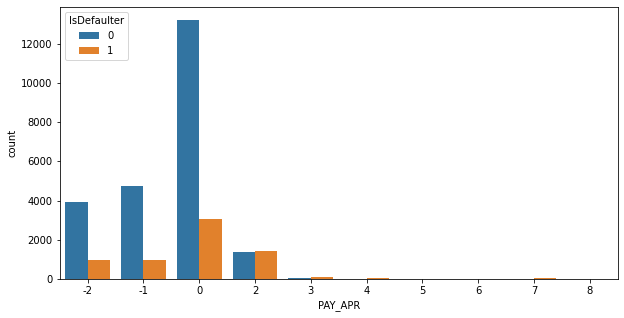

In [ ]:
#Plotting payment staus using countplot
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

###Overview of Paid amount

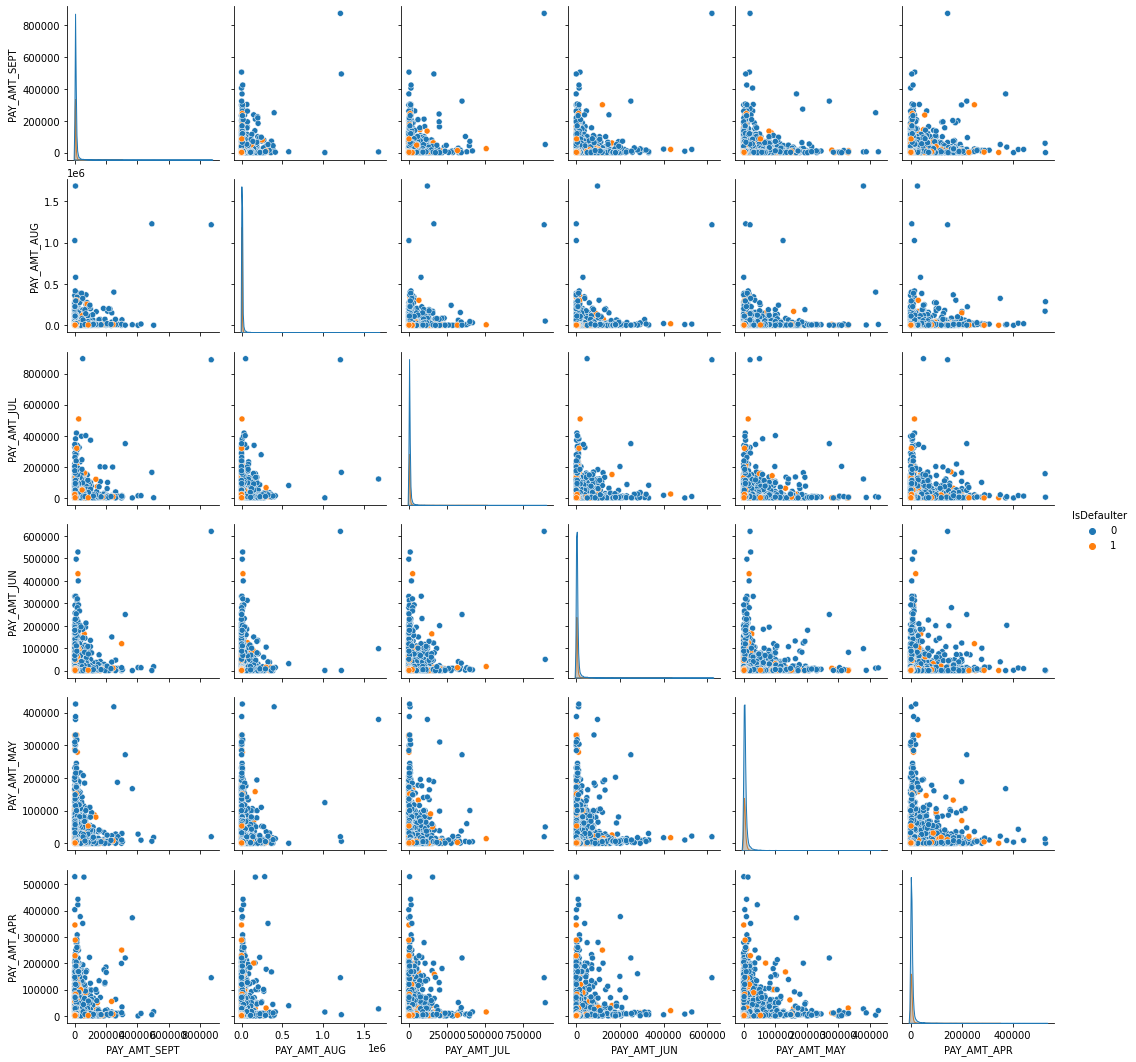

In [ ]:
#Plotting paid amount using pairplot
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

##Check for Imbalanced dataset

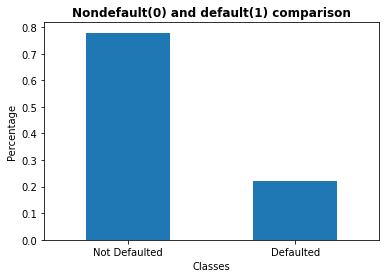

In [32]:
# Check for imbalanced data
cla_bal = df['IsDefaulter'].value_counts(normalize=True)
ax = cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

In [ ]:
cla_bal

0    0.7788
1    0.2212
Name: IsDefaulter, dtype: float64

###Applying SMOTE technique to deal with imbalanced dataset

In [39]:
#Appplying smote technique
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


##Feature Engineering

In [40]:
#creating columns list
columns = list(df.columns)

In [41]:
#Remove the last column
columns.pop()

'HAS_DEF'

In [42]:
#Create a new Dataframe with balanced data
balanced_df = pd.DataFrame(x_smote,columns=columns)

In [43]:
balanced_df['IsDefaulter'] = y_smote

In [ ]:
#check shape of new daatframe
balanced_df.shape

(46728, 25)

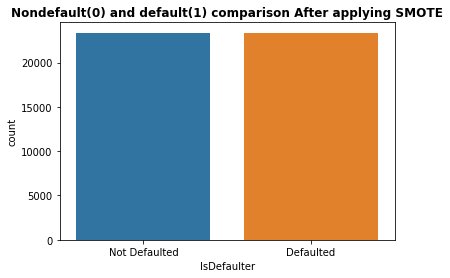

In [45]:
#plotting balanced data using countplot
ax = sns.countplot('IsDefaulter', data = balanced_df)
plt.title('Nondefault(0) and default(1) comparison After applying SMOTE',fontweight = "bold")
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

In [46]:
#creating new column 
balanced_df['Payement_Value'] = balanced_df['PAY_SEPT'] + balanced_df['PAY_AUG'] + balanced_df['PAY_JUL'] + balanced_df['PAY_JUN'] + balanced_df['PAY_MAY'] + balanced_df['PAY_APR']

In [47]:
#check mean of new feature wrt to default
balanced_df.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.98014
1    1.69774
Name: Payement_Value, dtype: float64

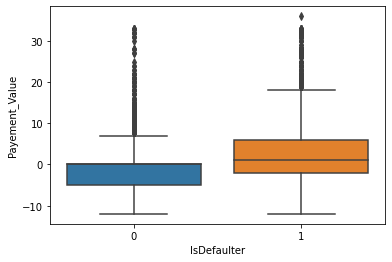

In [ ]:
#Plot new feature using boxplot
sns.boxplot(data = balanced_df, x = 'IsDefaulter', y = 'Payement_Value' )

In [48]:
#create new feature dues
balanced_df['Dues'] = (balanced_df['BILL_AMT_APR']+balanced_df['BILL_AMT_MAY']+balanced_df['BILL_AMT_JUN']+balanced_df['BILL_AMT_JUL']+balanced_df['BILL_AMT_SEPT'])-(balanced_df['PAY_AMT_APR']+balanced_df['PAY_AMT_MAY']+balanced_df['PAY_AMT_JUN']+balanced_df['PAY_AMT_JUL']+balanced_df['PAY_AMT_AUG']+balanced_df['PAY_AMT_SEPT'])

In [49]:
#check its mean wrt to default
balanced_df.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    196660.929207
Name: Dues, dtype: float64

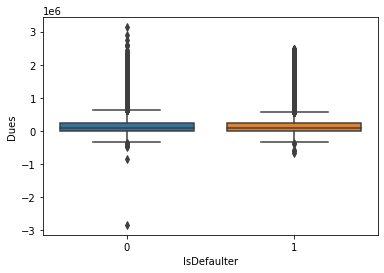

In [ ]:
#plotting dues using boxplot
sns.boxplot(data = balanced_df, x = 'IsDefaulter', y = 'Dues' )

In [50]:
#rename column names
balanced_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

###Label encoding

In [51]:
#Label encoding implemented
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
balanced_df = balanced_df.replace(encoders_nums)

###One hot encoding

In [52]:
#One Hot encoding implemented on Education and marriage features
balanced_df = pd.get_dummies(balanced_df,columns=['EDUCATION','MARRIAGE'])

###Drop not required columns

In [53]:
#drop columns
balanced_df.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [54]:
#drop columns
balanced_df.drop('ID',axis = 1, inplace = True)

###Creating 6 groups in AGE feature

In [55]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
balanced_df['AGE'] = pd.cut(balanced_df['AGE'],bins=bins, labels=labels,right=False)

# Covert categorical column into integer by extracting the code of the categories
balanced_df.AGE = balanced_df.AGE.cat.codes

##Correlation Heatmap

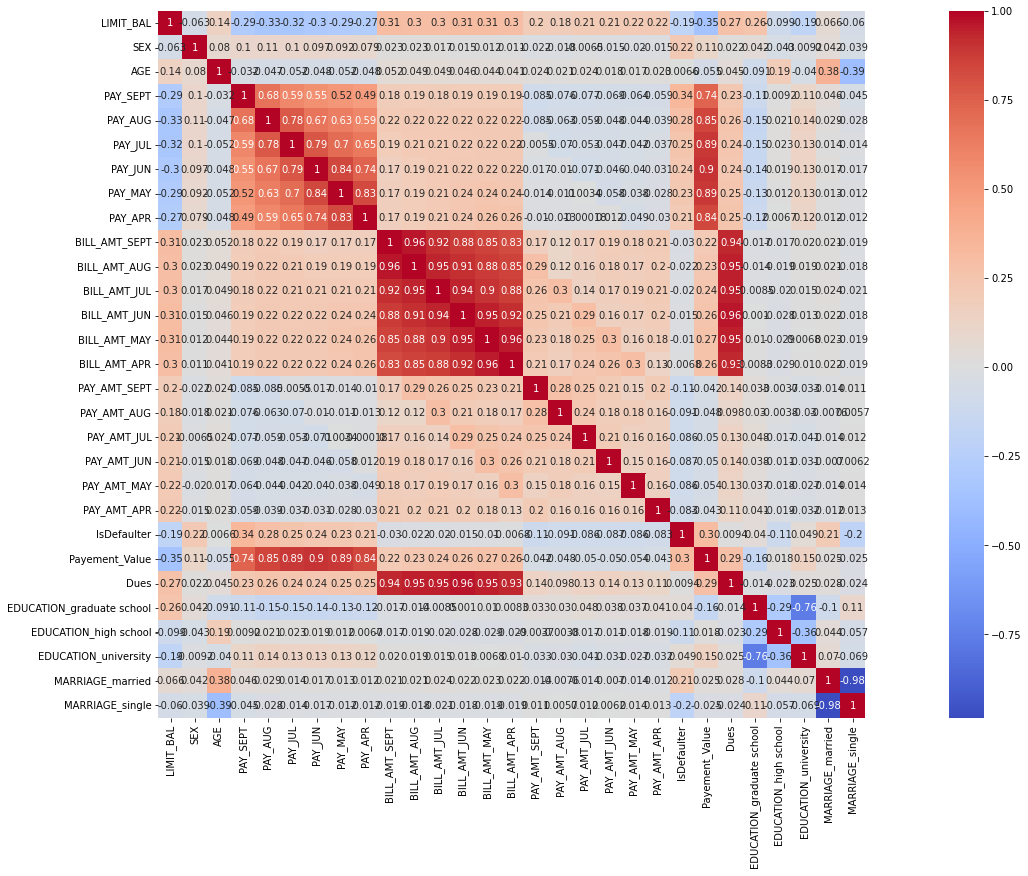

In [ ]:
#plot heatmap
correlation = balanced_df.corr()
plt.subplots(figsize=(30,13))
sns.heatmap( correlation, square=True, annot=True,cmap='coolwarm' )

##Separating Independent and Dependent variables 

In [56]:
#Independent variables 
X = balanced_df.drop(columns=['IsDefaulter','Payement_Value','Dues'],axis=1)
#dependent variable
y = balanced_df['IsDefaulter']

In [57]:
cols = X.columns

##Rescaling values using StandardScaler

In [58]:
#Rescaling independent features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

##Train test split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)

#Modelling

##1. Logistic Regression

In [ ]:
#create parameter grid to feed during hyperparameter tuning
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

###Hyperparameter tuning LR

In [ ]:
#Instanstiate Grid Search CV
grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
#fit the grid search
grid_lr.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    4.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [ ]:
#get best parameters
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
#get best estimator
optimized_val = grid_lr.best_estimator_

In [ ]:
#get best score
grid_lr.best_score_

0.7238374759240576

In [ ]:
# Predicted Probability
train_preds = optimized_val.predict_proba(X_train)[:,1]
test_preds = optimized_val.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_val.predict(X_train)
test_class_preds = optimized_val.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)
#get scores of various metrics
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on train data is  0.7237151854229723
The accuracy on test data is  0.718524859119766
The precision on test data is  0.7230703381366814
The recall on test data is  0.7165276403223526
The f1 on test data is  0.7197841215736401
The roc_score on test data is  0.7185431175985504


In [ ]:
y_preds_proba_lr = optimized_val.predict_proba(X_test)[::,1]

###Confusion matrix of LR

[[5005 2005]
 [1941 5068]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

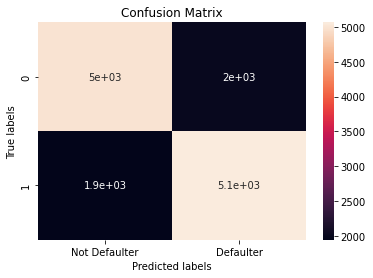

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

###Feature importance of LR

In [ ]:
feature_importance = pd.DataFrame({'Features':cols, 'Importance':np.abs(optimized_val.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

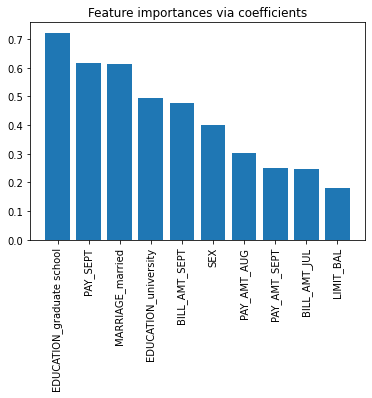

In [ ]:
#plot feature importance
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()

##2.Random Forest Classifier

In [ ]:
#Instantiate Random Forest Classifier
rf_clf = RandomForestClassifier()
#Fit the model
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)
# Get scores of various metrics
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on train data is  0.9975236173530221
The accuracy on test data is  0.8371495827091804
The precision on test data is  0.8195177628763018
The recall on test data is  0.8494528246081041
The f1 on test data is  0.8342168324740397
The roc_score on test data is  0.8375691847995737


###Hyperparameter tuning of Random Forest

In [ ]:
# Create parameter grid  
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [100, 150, 200]
}

In [ ]:
# Instantiate grid search model
grid_search = RandomizedSearchCV(estimator = rf_clf,param_distributions= param_grid,  scoring = 'accuracy',  
                          cv = 3, n_jobs = -1, verbose = 1)

In [ ]:
# Fit grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#get best parameters
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 150}

In [ ]:
#get best score
grid_search.best_score_

0.8067810082851814

In [ ]:
#get best estimator which can be used for prediction
optimal_rf_clf = grid_search.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

# Get scores of various metrics
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on train data is  0.9447246935094317
The accuracy on test data is  0.8253798416434839
The precision on test data is  0.800256812669425
The recall on test data is  0.8425717290070602
The f1 on test data is  0.8208693106980829
The roc_score on test data is  0.8262030065844863


In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

###Confusion matrix of RF

[[5962 1048]
 [1400 5609]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

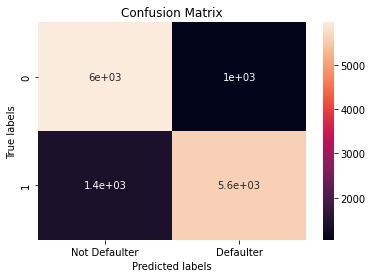

In [ ]:
#Plotting Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

###Feature Importance graph of RF

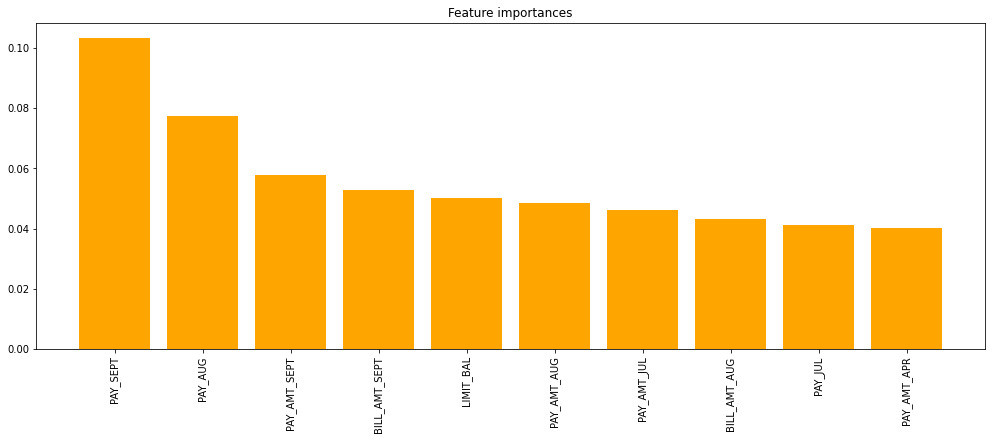

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = cols,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="orange",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 90)
plt.show()

##XGBoost

In [60]:
#import XGBClassifier
from xgboost import  XGBClassifier

In [61]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [62]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [63]:
#training our model 
num_round=50
xg=xgb.train(parameters,dtrain,num_round) 

In [64]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest)

In [65]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [66]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)
#get scores of various metrics
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on train data is  0.8050077960194442
The accuracy on test data is  0.7894286325700834
The accuracy on test data is  0.7894286325700834
The precision on test data is  0.7453274361535169
The recall on test data is  0.8173994680018777
The f1 on test data is  0.7797014925373136
The roc_score on train data is  0.791696587697845


###Hyperparameter tuning of XGB

In [67]:
#create parameter grid
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
#Instanstiate Grid search CV
gsearch_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=3, verbose = 2)
#fit grid search
gsearch_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=F

In [68]:
#get best score
gsearch_xgb.best_score_

0.8270200862148033

In [70]:
#get best parameters
gsearch_xgb.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [ ]:
#get best estimator
optimal_xgb = gsearch_xgb.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_score_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_score_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on test data is ", test_roc_score_xgb_tuned)

The accuracy on train data is  0.944571830383075
The accuracy on test data is  0.8372209144732149
The accuracy on test data is  0.8372209144732149
The precision on test data is  0.804822371236981
The recall on test data is  0.8605644546147979
The f1 on test data is  0.8317605426127987
The roc_score on test data is  0.8386423559247623


In [ ]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

###Confusion matrix of XGB

[[6096  914]
 [1368 5641]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

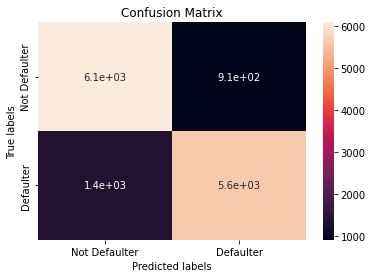

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

###Feature Importance of XGB

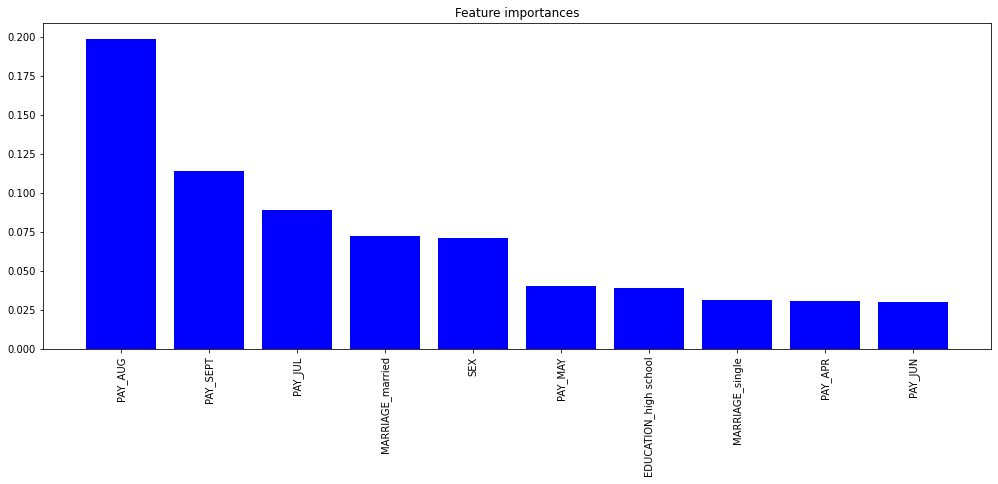

In [ ]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = cols,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 90)
plt.show()

##SVC

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']}

###Hyperparameter tuning

In [ ]:
#Instatntiate Randomized Search CV
grid_svc = RandomizedSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
# Fit the model
grid_svc.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 37.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=3)

In [ ]:
#get best estimator
optimal_SVC_clf = grid_svc.best_estimator_

In [ ]:
#get best parameters
grid_svc.best_params_

{'C': 100, 'kernel': 'rbf'}

In [ ]:
#Get best score
grid_svc.best_score_

0.7656302546699685

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7237151854229723
The accuracy on test data is  0.718524859119766


In [ ]:
#get scores on various metrics
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The precision on test data is  0.7637323441289771
The recall on test data is  0.7918639053254438
The f1 on test data is  0.7775437577166099
The roc_score on test data is  0.7818666544122742


In [ ]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

###Confusion matrix

[[5603 1407]
 [1656 5353]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

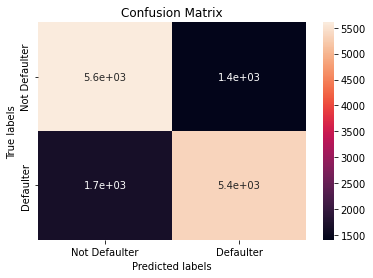

In [ ]:
# Get the confusion matrix for test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##Evaluating the models

In [ ]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest Classifier', 'Xgboost Classifier']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_score_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [ ]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.723715,0.718525,0.723070,0.716528,0.719784
1,SVC,0.847137,0.781511,0.763732,0.791864,0.777544
2,Random Forest Classifier,0.944725,0.825380,0.800257,0.842572,0.820869
3,Xgboost Classifier,0.944572,0.837221,0.804822,0.860564,0.831761


###ROC-AUC Curve Representation os all Models

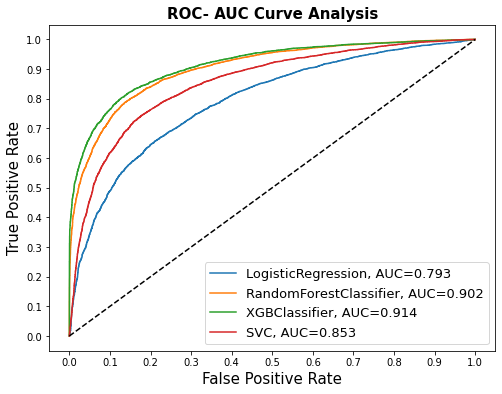

In [ ]:
classifiers_proba = [(optimized_val, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC- AUC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##Conclusion

###We have built predictive model for credit card agency to predict if a person would  default on his/her payment of credit card.

###We have performed feature engineering, feature selection, hyperparameter tuning to prevent overfitting and decrease error rate.

###Since the buisness nature of credit card default prediction requires model to high Recall. Therefore, XGBoost is our best model.

###The ROC-AUC curve of XGBoost is also maximum. 